### Instrucciones
1. Sin utilizar las bibliotecas de *scikit-learn* para regresión lineal, elabora un programa en Python que implemente **BGD monovariable sin sesgo**.

### Entrada
- Archivo `casas.csv`
- Número de iteraciones
- Peso inicial
- Valor de α (learning rate)

### Procedimiento
- Divide `casas.csv` en:
  - 70% para entrenamiento
  - 30% para pruebas  
  Usando los parámetros:  
  `shuffle=True` y `random_state=0`.

### Salida
(Ver ejemplo de la **Figura 1**)

- Peso en cada iteración calculado con el conjunto de entrenamiento.
- Valores `y_test`.
- Valores `y_pred` en cada iteración.
- Error de estimación:  

  $
  \sigma = \sum_{i=1}^{n} (y_{pred_i} - y_{test_i})
  $

- **Gráfica 1**
  - Distribución de los datos de prueba
  - Valores `y_pred` en cada iteración
- **Gráfica 2**
  - Error de estimación de cada iteración

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

$$Y = XW$$

In [128]:
def predict(X, weights):
    return X.dot(weights)

  $$
  \sigma = \sum_{i=1}^{n} (y_{pred_i} - y_{test_i})
  $$

In [129]:
def error(y_true, y_pred):
    return sum(y_pred - y_true)

$$ \frac{\partial \sigma}{\partial w} = (w \times X - Y) \cdot X$$

In [130]:
def gradient(index, W, X, Y):
    print("=== GRADIENT === ")
    print("X: ", X.T[index])
    print("W: ", W, " W index: ", W[index])
    print("Y: ", Y)
    Y_pred = W[index] * X.T[index]  # Predicción
    return np.dot((Y_pred - Y), X.T[index])  # Gradiente

In [131]:
def gradient_bueno(index, W, X, Y):
    """
    Gradiente para W[index] en regresión multivariable
    Fórmula: grad_i = (1/m) * X[:, i].T @ (X @ W - Y)
    """
    m = len(Y)
    Y_pred = predict(X, W)  # Predicción con TODOS los pesos
    residual = Y_pred - Y
    return np.dot(X[:, index], residual)

$$\Delta w = -2 \times \frac{\partial \sigma}{\partial w} \times \alpha$$

In [132]:
def increment(index, W, X, Y, alpha):
    grad = gradient_bueno(index, W, X, Y)
    print("=== GRADIENT ===")
    print(grad)
    return - 2 * alpha * grad

$$w = w + \Delta w$$

In [133]:
def update_weights(W, X, Y, alpha):
    increments = np.array([increment(i, W, X, Y, alpha) for i in range(len(W))])
    W += increments


In [ ]:
def batch_gradient_descent(X, Y, initial_weights, learning_rate=0.01, n_iterations=1000):
    """BGD multivariable sin sesgo"""
    m, n = X.shape
    W = np.array(initial_weights)
    
    if len(W) != n:
        raise ValueError(f"Se necesitan {n} pesos para {n} características")
    
    weights_history = []
    errors_history = []
    
    for iteration in range(n_iterations):
        update_weights(W, X, Y, learning_rate)
        
        # Guardar copia completa del vector de pesos
        weights_history.append(W.copy())
        
        # Calcular error
        Y_pred = predict(X, W)
        current_error = error(Y, Y_pred)
        errors_history.append(current_error)

        print(f"Iter {iteration}: W = {W}, Error = {current_error:.4f}")
    
    return W, weights_history, errors_history

Dataset: (10, 6)
    x1   x2    x3    x4    x5     y
0  1.0  0.4 -12.0  12.0  10.2  11.6
1  1.0  0.6 -15.0  16.0  11.9  14.5
2  1.0  0.8 -18.0  20.0  13.6  17.4
3  1.0  1.0 -21.0  24.0  15.3  20.3
4  1.0  1.2 -24.0  28.0  17.0  23.2

=== CONFIGURACIÓN ===
Características: 5
Pesos iniciales: [0. 0. 0. 0. 0.]
Learning rate: 1e-06
Iteraciones: 10

X_train: (7, 5)
Y_train: (7,)

=== ENTRENAMIENTO ===
=== GRADIENT ===
-171.1
=== GRADIENT ===
-256.94000000000005
=== GRADIENT ===
4880.7
=== GRADIENT ===
-5823.2
=== GRADIENT ===
-3347.47
Iter 0: W = [ 0.0003422   0.00051388 -0.0097614   0.0116464   0.00669494], Error = -166.1119
=== GRADIENT ===
-166.11191862599998
=== GRADIENT ===
-249.41361330760003
=== GRADIENT ===
4737.875711369999
=== GRADIENT ===
-5652.719940656
=== GRADIENT ===
-3249.5767597714002
=== GRADIENT ===
-161.26981916518656
=== GRADIENT ===
-242.10749646543934
=== GRADIENT ===
4599.23136197271
=== GRADIENT ===
-5487.229205969534
=== GRADIENT ===
-3154.548490279503
=== GRADIENT

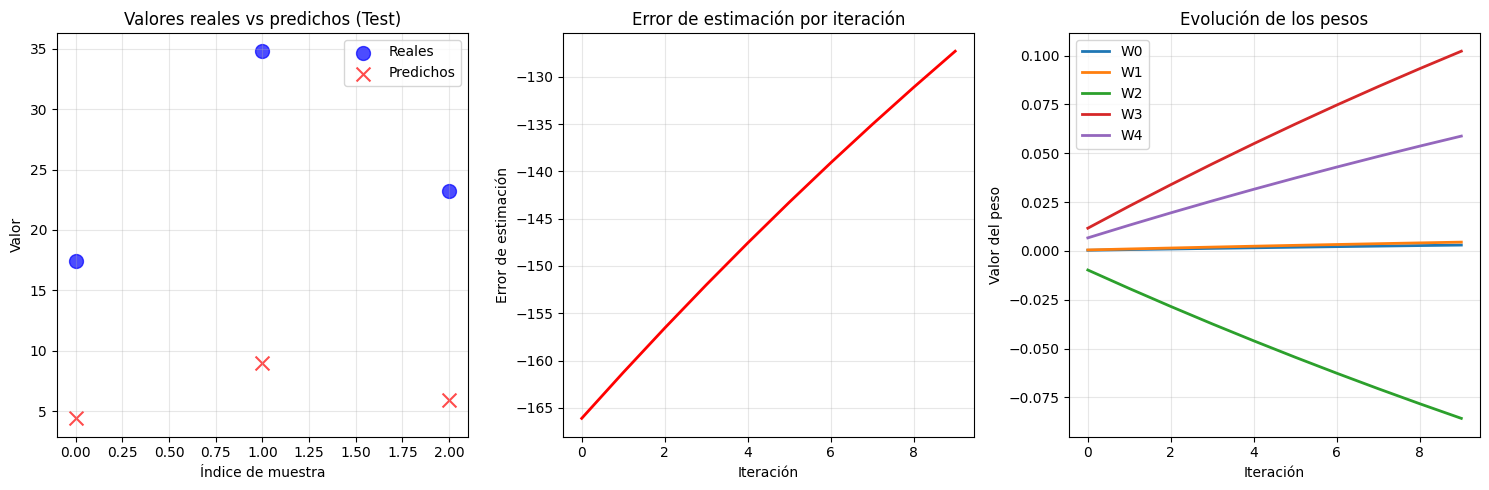

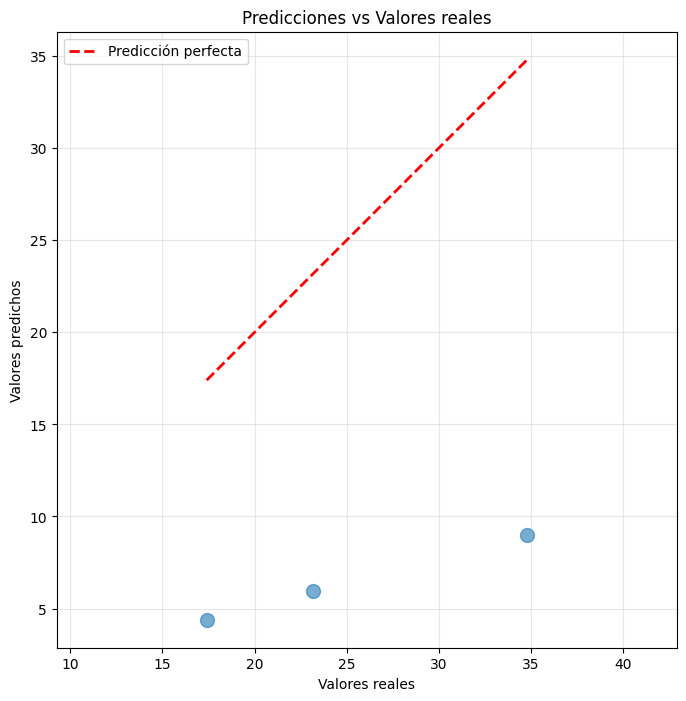

In [135]:
dataset = pd.read_csv('Dataset_multivariable.csv')
print(f"Dataset: {dataset.shape}")
print(dataset.head())

# Parámetros
n_features = dataset.shape[1] - 1
initial_weights = np.zeros(n_features)
learning_rate = 0.000001
n_iterations = 10

print(f"\n=== CONFIGURACIÓN ===")
print(f"Características: {n_features}")
print(f"Pesos iniciales: {initial_weights}")
print(f"Learning rate: {learning_rate}")
print(f"Iteraciones: {n_iterations}")

# División 70-30
X_train, X_test, Y_train, Y_test = train_test_split(
    dataset.iloc[:, :-1].values,
    dataset.iloc[:, -1].values,
    test_size=0.3,
    shuffle=True,
    random_state=0
)

print(f"\nX_train: {X_train.shape}")
print(f"Y_train: {Y_train.shape}")

# Entrenamiento
print("\n=== ENTRENAMIENTO ===")
best_weights, weights_history, errors_history = batch_gradient_descent(
    X_train, Y_train, initial_weights, learning_rate, n_iterations
)

# Predicción en test
Y_pred = predict(X_test, best_weights)

# Resultados
print("\n=== RESULTADOS FINALES ===")
print(f"Pesos finales: {best_weights}")
print(f"\nValores y_test: {Y_test}")
print(f"Valores y_pred: {Y_pred}")
print(f"Error en test: {error(Y_test, Y_pred):.6f}")

# ============ GRÁFICAS ============

plt.figure(figsize=(15, 5))

# GRÁFICA 1: Valores reales vs predichos
plt.subplot(1, 3, 1)
indices = np.arange(len(Y_test))
plt.scatter(indices, Y_test, color='blue', label='Reales', s=100, alpha=0.7)
plt.scatter(indices, Y_pred, color='red', label='Predichos', marker='x', s=100, alpha=0.7)
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Valores reales vs predichos (Test)')
plt.legend()
plt.grid(True, alpha=0.3)

# GRÁFICA 2: Error vs iteración
plt.subplot(1, 3, 2)
plt.plot(errors_history, color='red', linewidth=2)
plt.xlabel('Iteración')
plt.ylabel('Error de estimación')
plt.title('Error de estimación por iteración')
plt.grid(True, alpha=0.3)

# GRÁFICA 3: Evolución de pesos
plt.subplot(1, 3, 3)
weights_array = np.array(weights_history)
for i in range(n_features):
    plt.plot(weights_array[:, i], label=f'W{i}', linewidth=2)
plt.xlabel('Iteración')
plt.ylabel('Valor del peso')
plt.title('Evolución de los pesos')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfica adicional: Predicciones vs Reales
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, Y_pred, alpha=0.6, s=100)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         'r--', lw=2, label='Predicción perfecta')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Predicciones vs Valores reales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()